In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
!pip install sklearn

In [34]:
heart_df = pd.read_csv('datasets/heart.csv')

In [35]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
heart_df.shape

(303, 14)

In [38]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [39]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
sns.set_theme(palette="Accent") # changing the color palette for fun

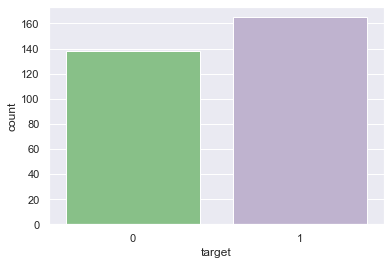

In [41]:
ax = sns.countplot(x="target", data=heart_df)

In [42]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [43]:
x = heart_df.drop(['target'], axis = 1) # we will use all columns except 'class'
y = heart_df['target'] # this is our target value

In [44]:
x.shape, y.shape

((303, 13), (303,))

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.50)

In [47]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((151, 13), (152, 13), (151,), (152,))

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model = DecisionTreeClassifier() # initialize our model

In [50]:
model.fit(x, y)

DecisionTreeClassifier()

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
y_predictions = model.predict(x)

In [53]:
accuracy_score(y_predictions, y)

1.0

In [54]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [55]:
y_predictions = model.predict(xtest)
accuracy_score(y_predictions, ytest)

0.743421052631579

In [56]:
from sklearn import tree

[Text(154.52307692307693, 201.90857142857143, 'X[11] <= 0.5\ngini = 0.495\nsamples = 151\nvalue = [68, 83]'),
 Text(70.82307692307693, 170.84571428571428, 'X[12] <= 2.5\ngini = 0.325\nsamples = 88\nvalue = [18, 70]'),
 Text(25.753846153846155, 139.78285714285715, 'X[12] <= 0.5\ngini = 0.063\nsamples = 61\nvalue = [2, 59]'),
 Text(12.876923076923077, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(38.63076923076923, 108.72, 'X[7] <= 136.5\ngini = 0.033\nsamples = 60\nvalue = [1, 59]'),
 Text(25.753846153846155, 77.65714285714284, 'X[7] <= 134.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(12.876923076923077, 46.59428571428572, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(38.63076923076923, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(51.50769230769231, 77.65714285714284, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(115.8923076923077, 139.78285714285715, 'X[9] <= 0.7\ngini = 0.483\nsamples = 27\nvalue = [16, 11]'),
 Text(90.13846153846

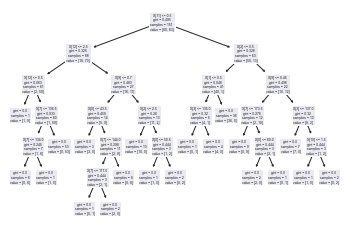

In [57]:
tree.plot_tree(model)

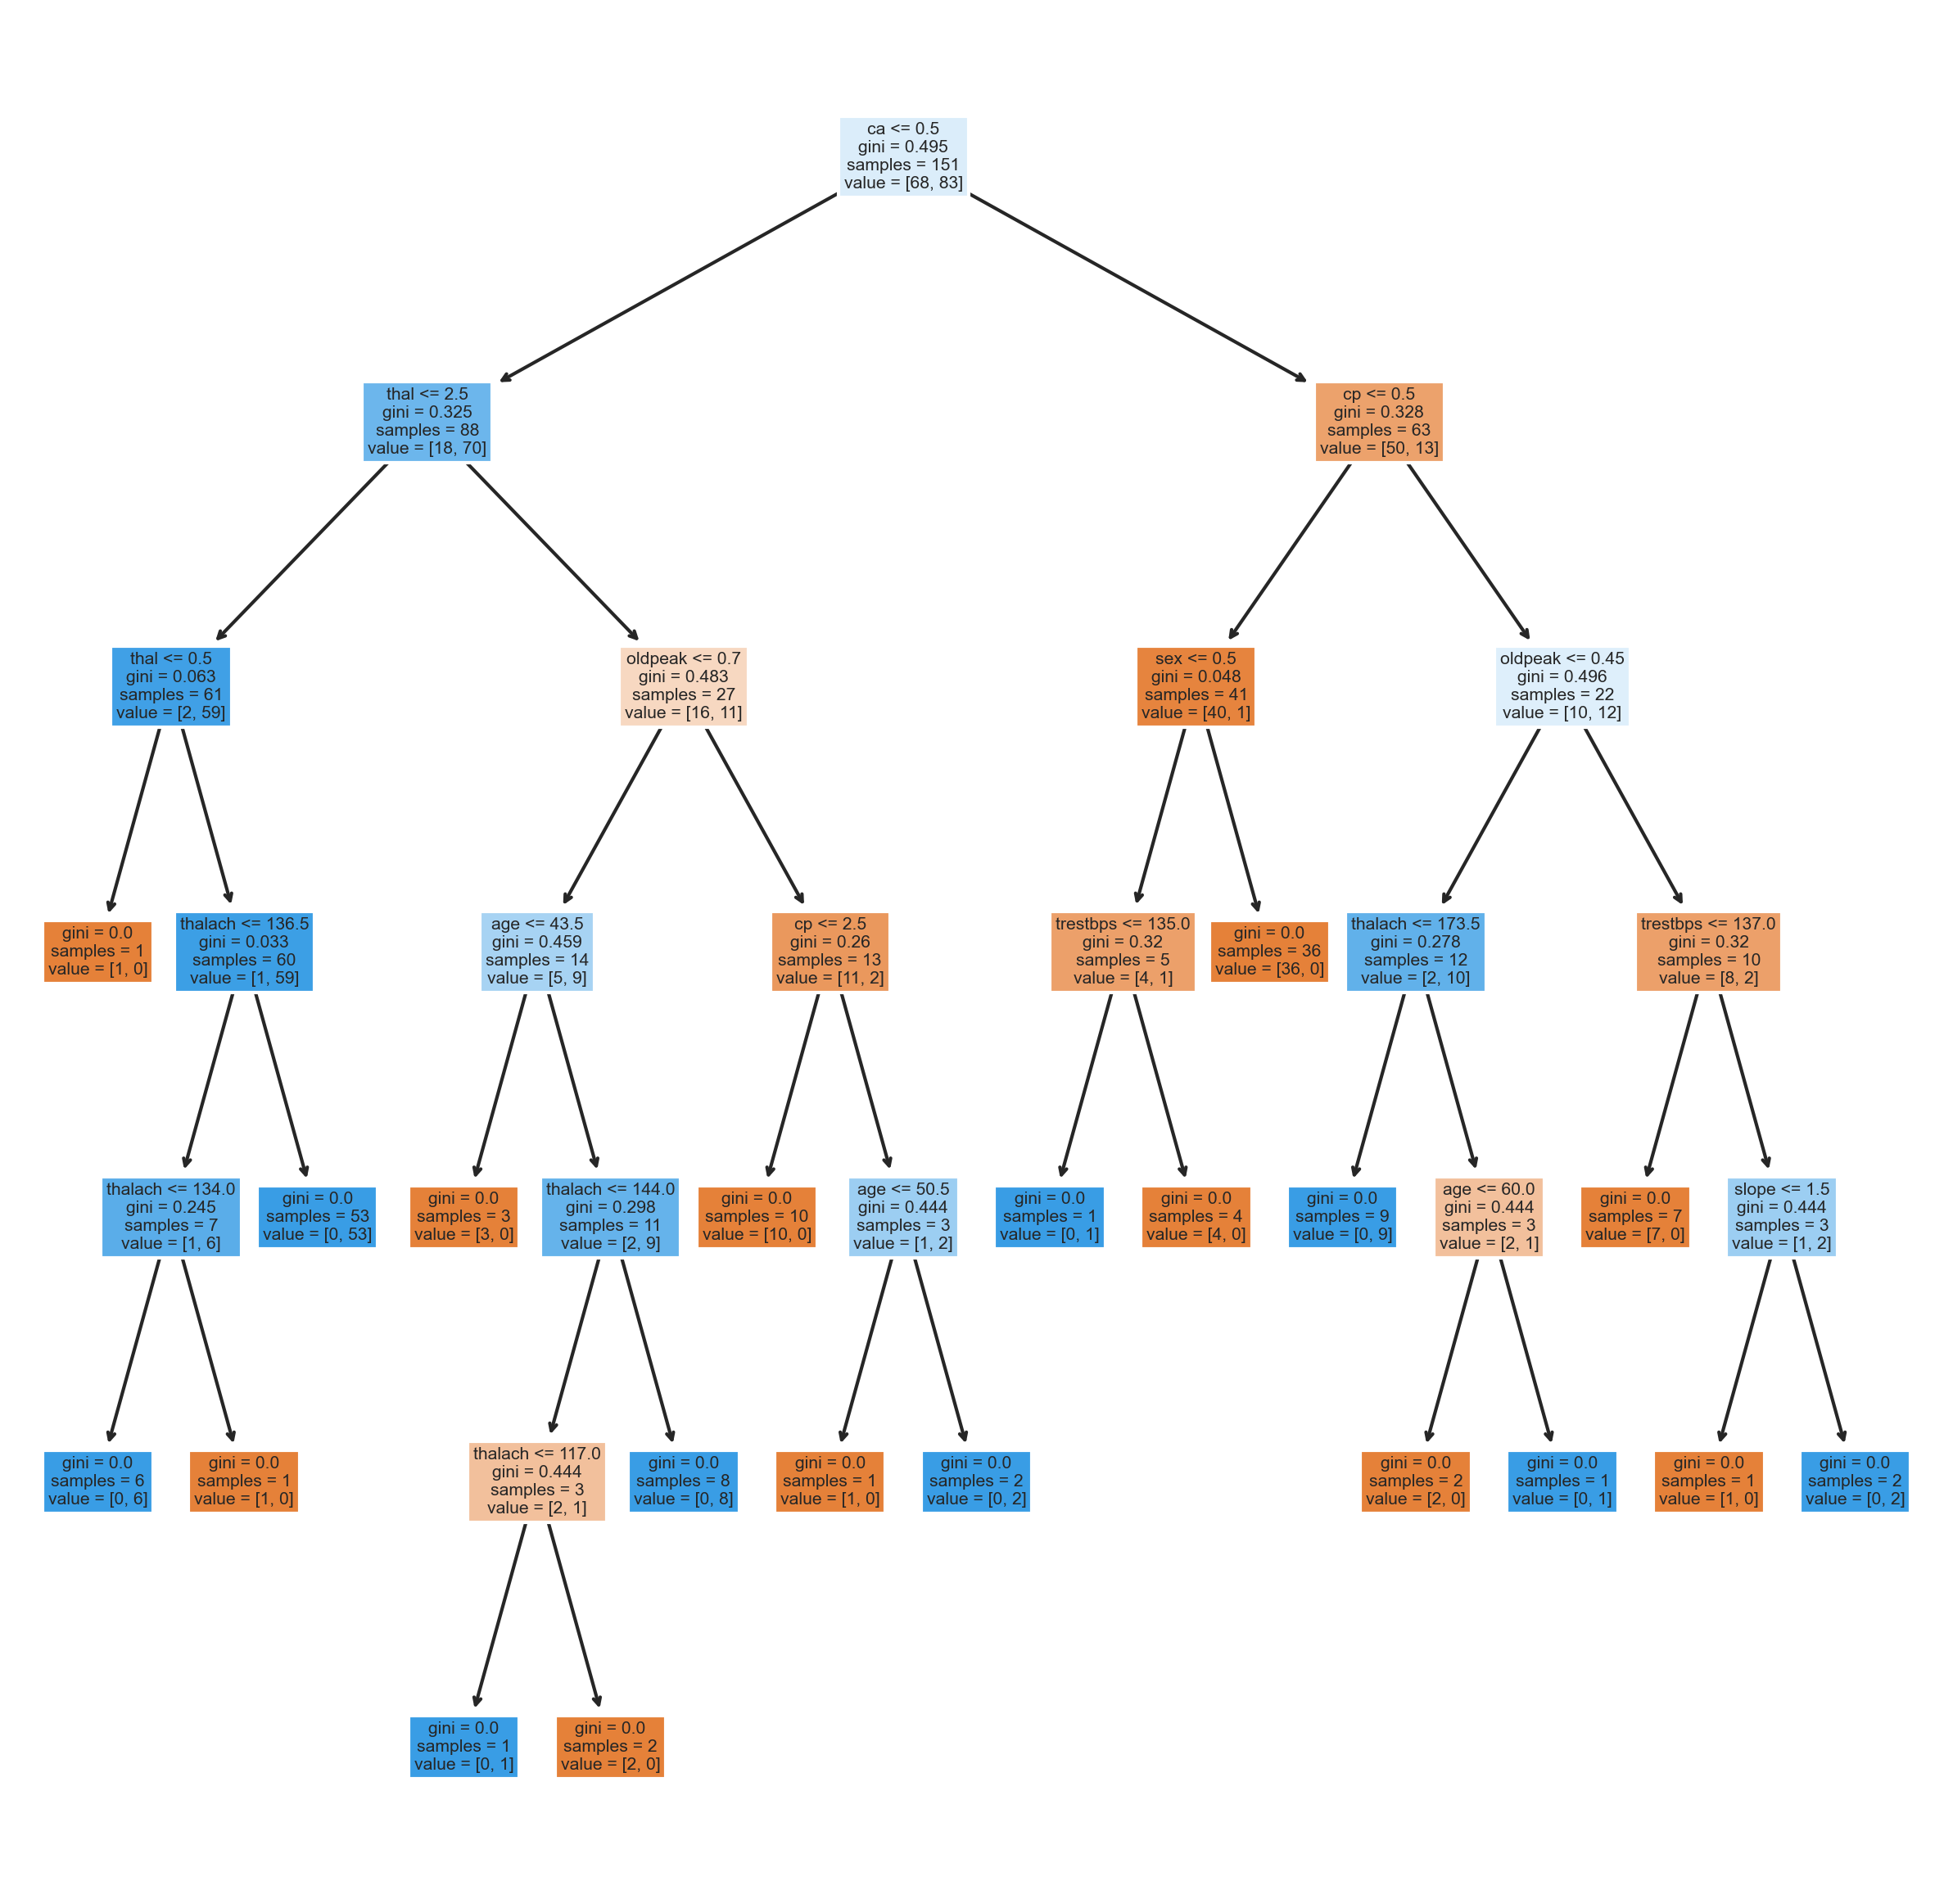

In [58]:
# Grabbed from: https://stackoverflow.com/questions/59174665/how-can-i-adjust-the-size-of-the-plot-tree-graph-in-sklearn-to-make-it-readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model, feature_names = x.columns, filled=True);

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
confusion_matrix(ytest, y_predictions)

array([[48, 22],
       [17, 65]])

In [61]:
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        70
           1       0.75      0.79      0.77        82

    accuracy                           0.74       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.74      0.74      0.74       152

